In [2]:
import numpy as np
import pandas as pd
import pysal as ps
from pysal.contrib.gwr.sel_bw import Sel_BW
from pysal.contrib.gwr.gwr import GWR
from pysal.contrib.glm.family import Gaussian
from scipy.stats import pearsonr

In [3]:
#Data

data = '/Users/toshan/dev/pysal/pysal/examples/georgia/GData_utm.csv'
data = pd.read_csv(data)
#shp = gp.read_file('/Users/toshan/dev/pysal/pysal/examples/georgia/G_utm.shp')
#shp.plot()

In [4]:
# Prep data into design matrix and coordinates

#Dependent variable
y = data.PctBach.reshape((-1,1))

#Design matrix - covariates - intercept added automatically
pov = data.PctPov.reshape((-1,1))
rural = data.PctRural.reshape((-1,1))
blk = data.PctBlack.reshape((-1,1))
X = np.hstack([rural, pov, blk])
labels = ['Intercept', 'PctPov', 'PctRural', 'PctBlack']

#Coordinates for calibration points
u = data.X
v = data.Y
coords = np.array(zip(u,v))



/anaconda/envs/test_gwr/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda/envs/test_gwr/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda/envs/test_gwr/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda/envs/test_gwr/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [7]:
index = np.arange(len(y))
train = index[0:-10]
test = index[-10:]

y_train = y[train]
X_train = X[train]
coords_train = list(coords[train])

y_test = y[test]
X_test = X[test]
coords_test = list(coords[test])

bw = Sel_BW(coords, y, X, kernel='bisquare', fixed=False)
bw = bw.search(search='golden_section', criterion='AICc')
print bw

model = GWR(coords, y, X, bw, family=Gaussian(), fixed=False, kernel='bisquare')
results = model.predict(coords_test, X_test)

93.0


In [8]:
results.predictions

array([[ 10.51695514],
       [  9.93321992],
       [  8.92473026],
       [  5.47350219],
       [  8.61756585],
       [ 12.8141851 ],
       [  5.55619405],
       [ 12.63004172],
       [  8.70638418],
       [  8.17582599]])

In [50]:
bw = Sel_BW(coords, y, X, kernel='bisquare', fixed=False)
bw = bw.search(search='golden_section', criterion='AICc')
print bw

t = GWR(coords, y, X, bw).fit()

model = GWR(coords, y, X, bw, family=Gaussian(), fixed=False, kernel='bisquare')
results = model.predict(coords_test, X_test)


93.0


In [51]:
print pearsonr(results.predictions, y_test)

print results.params[0:]
print t.params[-10:]


(array([ 0.45389284]), array([ 0.18761856]))
[[  2.27719806e+01  -2.15093080e-01  -1.02539506e-01  -1.40496359e-02]
 [  1.91053102e+01  -2.32528744e-01  -9.41767859e-02   7.19130384e-02]
 [  1.97434217e+01  -3.08929815e-01  -8.04472131e-02   8.32061891e-02]
 [  1.75057600e+01  -1.87954544e-01  -7.89191503e-02   5.17192228e-02]
 [  2.77474018e+01  -2.08553416e-01  -1.65334529e-01   4.06743861e-03]
 [  2.62106267e+01  -3.60514422e-01  -1.38397963e-01   7.21984934e-02]
 [  1.80348332e+01  -2.60555691e-01  -7.70473064e-02   8.43194028e-02]
 [  2.84528022e+01  -1.40970116e-01  -1.63408415e-01  -6.30756266e-02]
 [  2.23530956e+01  -2.26653837e-01  -1.03045606e-01   2.99244694e-03]
 [  1.82205077e+01  -3.09812424e-01  -7.40336720e-02   1.08635554e-01]]
[[  2.27719806e+01  -2.15093080e-01  -1.02539506e-01  -1.40496359e-02]
 [  1.91053102e+01  -2.32528744e-01  -9.41767859e-02   7.19130384e-02]
 [  1.97434217e+01  -3.08929815e-01  -8.04472131e-02   8.32061891e-02]
 [  1.75057600e+01  -1.87954544

In [26]:
#Find optimal bandwidth using golden section search to minimize AICc

#Instantiate bandwidth selection class - bisquare NN (adaptive)
bw = Sel_BW(coords, y, X, kernel='bisquare', fixed=False)

#Find optimal bandwidth by minimizing AICc using golden section search algorithm
bw = bw.search(search='golden_section', criterion='AICc')
print bw

model_a = GWR(coords, y, X, bw, family=Gaussian(), fixed=False, kernel='bisquare')
results_a = model_a.fit()

print len(results_a.localR2)
print np.mean(results_a.localR2)
exog_scale = results_a.scale
exog_resid = results_a.resid_response

93.0
159
0.56813744327


In [9]:
model_b = GWR(coords, y, X, 93, family=Gaussian(), fixed=False, kernel='bisquare', points=coords_b, exog_scale=exog_scale, exog_resid=exog_resid)
results_b = model_b.fit()

print len(results_b.localR2)
print np.mean(results_b.localR2)
results_b.params

NameError: name 'exog_scale' is not defined

In [9]:
print results_b.bse[0:10, 1]

print results_b.tvalues[0:10, 1]

print results_b.localR2

[ 0.10295359  0.12385708  0.10256179  0.11029685  0.12763962  0.13120828
  0.11315837  0.11694384  0.09973951  0.1078668 ]
[-2.08922363 -1.87739571 -3.01213362 -1.70407901 -1.63392388 -2.74764987
 -2.3025755  -1.20545144 -2.27245792 -2.87217588]
[[ 0.53068693]
 [ 0.59582647]
 [ 0.59700925]
 [ 0.45769954]
 [ 0.54634509]
 [ 0.5494828 ]
 [ 0.55159604]
 [ 0.55634237]
 [ 0.53903842]
 [ 0.55884954]]


In [12]:
#Results in a set of mappable results 
results.params.shape

NameError: name 'results' is not defined

In [ ]:
#Map Parameter estimates and T-vals for each covariate

for param in range(results.params.shape[1]):
    shp[str(param)] = results.params[:,param]
    vmin, vmax = np.min(shp[str(param)]), np.max(shp[str(param)]) 
    ax = shp.plot(str(param), vmin=vmin, vmax=vmax, figsize=(8,8), cmap='YlOrRd')
    ax.set_title(labels[param] + ' Estimates')
    fig = ax.get_figure()
    cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='YlOrRd')
    sm._A = []
    fig.colorbar(sm, cax=cax)
    
    shp[str(param)] = results.tvalues[:,param]
    vmin, vmax = np.min(shp[str(param)]), np.max(shp[str(param)]) 
    ax = shp.plot(str(param), vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Greys')
    ax.set_title(labels[param] + ' T-vals')
    fig = ax.get_figure()
    cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
    sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Greys')
    sm._A = []
    fig.colorbar(sm, cax=cax)

    

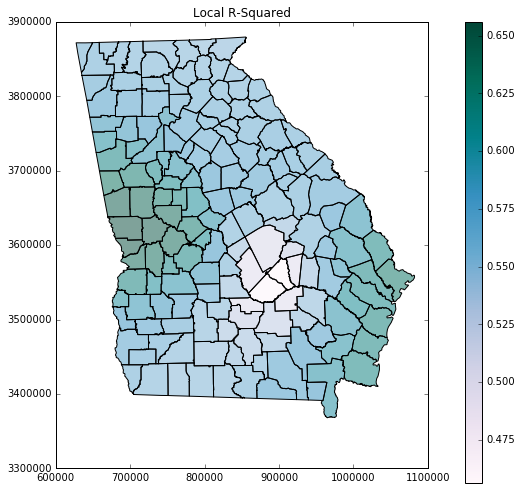

In [121]:
#Map local R-square values which is a weighted R-square at each observation location

shp['localR2'] = results.localR2
vmin, vmax = np.min(shp['localR2']), np.max(shp['localR2']) 
ax = shp.plot('localR2', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='PuBuGn')
ax.set_title('Local R-Squared')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='PuBuGn')
sm._A = []
fig.colorbar(sm, cax=cax)



In [9]:
??GWR


In [11]:
dists = np.zeros((10,159))
for x, point1 in enumerate(coords_b):
    for y, point2 in enumerate(coords):
        
        dists[x,y] = np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

In [12]:
dists

array([[ 135141.51708594,  176669.03854578,  150233.03041745, ...,
         101245.68031101,   37465.45393773,  186494.71599871],
       [  53079.72071743,   93989.76293746,   56523.70300113, ...,
         272750.51071353,  192366.73910219,  185946.3168796 ],
       [ 211071.91332835,  179410.69684634,  203731.38642588, ...,
         259876.04309332,  157691.66651843,   90086.32599479],
       ..., 
       [ 233459.02913062,  277886.65118938,  250155.19163993, ...,
              0.        ,  116483.88542009,  277512.51277944],
       [ 142506.80885168,  169996.21028779,  153162.14012036, ...,
         116483.88542009,       0.        ,  161268.74061156],
       [ 144540.5180503 ,   95782.96853831,  130844.73173151, ...,
         277512.51277944,  161268.74061156,       0.        ]])

In [11]:
from pysal.contrib.gwr.kernels import adapt_bisquare, _Kernel

In [26]:
all_coords = np.vstack([coords, coords_b])

W = adapt_bisquare(all_coords, 93)

i = len(coords_b)
j = len(coords)
W = W[i:, :-j].T

In [10]:
test = _Kernel(coords, fixed=False, function='bisquare', truncate=False, k=92, points=coords_b)

In [11]:
test.kernel

array([[  2.14343799e-01,   6.75977473e-03,   1.13120557e-01, ...,
          4.88014350e-01,   9.19154786e-01,   5.15666694e-04],
       [  9.27168014e-01,   7.80855123e-01,   9.17619421e-01, ...,
          4.11566468e-04,   2.62825351e-01,   2.96646476e-01],
       [  2.55461442e-03,   9.86090262e-02,   1.33250285e-02, ...,
          1.92971340e-01,   2.20950550e-01,   6.84004125e-01],
       ..., 
       [  3.01668776e-02,   4.39435726e-01,   1.20801314e-01, ...,
          1.00000000e+00,   5.00997875e-01,   4.33523139e-01],
       [  1.02455255e-01,   1.05479492e-03,   4.60574281e-02, ...,
          2.97821020e-01,   1.00000000e+00,   1.67110298e-02],
       [  3.42081437e-01,   6.68642075e-01,   4.35361409e-01, ...,
          2.81165199e-01,   2.33510795e-01,   1.00000000e+00]])

In [49]:
W[0]

array([ 0.        ,  0.17538125,  0.87525431,  0.42934275,  0.80242504,
        0.70359714,  0.27695634,  0.        ,  0.03083999,  0.76946793,
        0.7311884 ,  0.        ,  0.        ,  0.79126134,  0.70002409,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00106685,
        0.        ,  0.7250386 ,  0.        ,  0.85643026,  0.34265747,
        0.01878214,  0.50266628,  0.        ,  0.        ,  0.1835491 ,
        0.        ,  0.        ,  0.11051018,  0.        ,  0.43041104,
        0.05143613,  0.10487   ,  0.        ,  0.02865854,  0.6171386 ,
        0.66370484,  0.        ,  0.58953303,  0.85720095,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.06040493,  0.80528346,  0.        ,  0.17767534,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.04826184,  0.58892109,  0.        ,  0.        ,  0.96

In [13]:
from pysal.contrib.gwr.kernels import adapt_bisquare, _Kernel
#W = adapt_bisquare(coords, 93, coords_b)
w = _Kernel(coords, fixed=False, k=93-1, function='bisquare', points=coords_b, truncate=False)
#W = _Kernel(coords, fixed=False, function='bisquare', truncate=False, k=92, points=coords_b)

In [16]:
w.bandwidth

array([[ 184412.62167661],
       [ 275559.98944177],
       [ 216617.15163301],
       [ 187859.24904361],
       [ 267873.107272  ],
       [ 313030.23895156],
       [ 177791.79358056],
       [ 215493.75350882],
       [ 172825.86012155],
       [ 224337.23222372]])

In [10]:
??adapt_bisquare()

In [8]:
results_a.TSS / results_a.RSS

ValueError: operands could not be broadcast together with shapes (4,1) (159,1) 

In [10]:
results_a.localR2

array([[ 0.55018249],
       [ 0.55508304],
       [ 0.55067801],
       [ 0.56737294],
       [ 0.56034496],
       [ 0.55163749],
       [ 0.55802282],
       [ 0.56646836],
       [ 0.50958839],
       [ 0.5488834 ],
       [ 0.57973455],
       [ 0.53019011],
       [ 0.60128026],
       [ 0.56221182],
       [ 0.60339059],
       [ 0.5763165 ],
       [ 0.54286951],
       [ 0.5833684 ],
       [ 0.57449946],
       [ 0.61737272],
       [ 0.55380111],
       [ 0.61102546],
       [ 0.54879739],
       [ 0.60489614],
       [ 0.61531061],
       [ 0.63084783],
       [ 0.56313164],
       [ 0.56211435],
       [ 0.55190234],
       [ 0.58028618],
       [ 0.59173197],
       [ 0.58525895],
       [ 0.57748692],
       [ 0.5337402 ],
       [ 0.55415337],
       [ 0.54475232],
       [ 0.55563599],
       [ 0.61699849],
       [ 0.60978055],
       [ 0.57534427],
       [ 0.55258532],
       [ 0.55419367],
       [ 0.55921201],
       [ 0.57623454],
       [ 0.50215786],
       [ 0

In [47]:
np.sum(results_b.W[0].reshape((-1,1)) * (results_b.y.reshape((-1,1)) - results_a.predy.reshape((-1,1)))**2)

385.87740857134793

In [19]:
(results_a.y - results_a.mu)[0:5]

array([-0.62264884,  0.79783573, -1.90581472,  0.58585524, -1.77602421])

In [39]:
(results_a.y.reshape((-1,1)) - results_a.predy.reshape((-1,1)))[0:5]

array([[-0.62264884],
       [ 0.79783573],
       [-1.90581472],
       [ 0.58585524],
       [-1.77602421]])

In [41]:
results_a.resid_response[0:5]

array([-0.62264884,  0.79783573, -1.90581472,  0.58585524, -1.77602421])

In [40]:
print len(test)

TypeError: object of type 'GWRResults' has no len()

In [41]:
print(train)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148]


In [42]:
print len(coords)

159
